# For Ex1: Summing up Sine-waves With Different Amplitudes

By multiplying a **column** vector for the frequencies with a **row** vector for the time-steps we can in one step create a data-matrix

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi  # I just hate it to make code harder to read with the "np.pi"

In [68]:
# Set the parameters
rate = 1000
freqs = np.c_[[1, 15]] # This is a quick way to generate a column-vector ...
amps = np.r_[1, 0.1] # ... and this to generate a row-vector

In [69]:
dt = 1/rate
t = np.arange(0, 1, dt)
omega = 2*pi * freqs
omega.shape  # Just to show you that it is a column vector

(2, 1)

In [70]:
# Column vectors can also be created with
freqs2 = np.atleast_2d([1.5, 8]).T
print(freqs)

[[ 1]
 [15]]


In [71]:
# Now create a row of sines - in one step!
sine_mat = np.sin(omega*t) # numpy achives this with "broadcasting"
sine_mat.shape

(2, 1000)

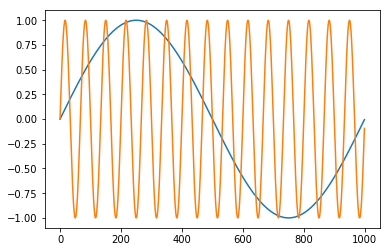

In [72]:
# Show the two columns
plt.plot(sine_mat.T)

By multiplying a **(1x2)-amplitude vector** with a **(2xn)-data matrix** we obtain a **(1xn)**-shaped output.
(From Python 3.5 on, "@" can be used for the scalar product.

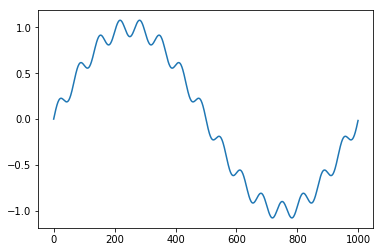

In [73]:
# Now multiply the data-matrix with the correpsponding amplitudes, and sum up the results
output = amps @ sine_mat
plt.plot(output)

## Doing it in Loops

For Exercise 1 you are supposed to evaluate the incoming sound in short time-windows. Here is how this can be done

In [74]:
#Pre-allocate memory, to make the loop faster
output = np.ones_like(t)

In [75]:
win_size = 101  # I deliberately choose an uneven "win_size", to demonstrate how to handle the reminder
for loop_nr in range(len(output)//win_size):  # "//" gives the floored integer of the division
    start = loop_nr*win_size
    stop = start + win_size
    output[start:stop] = amps@sine_mat[:,start:stop]  # Since this is a demo, I leave "amps" constant
 
# And to finish up the last few points
output[stop:] = amps@sine_mat[:,stop:]

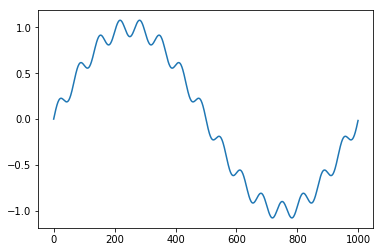

In [76]:
plt.plot(output)